In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=9.118239523279353 et b_1=4.66508935617289


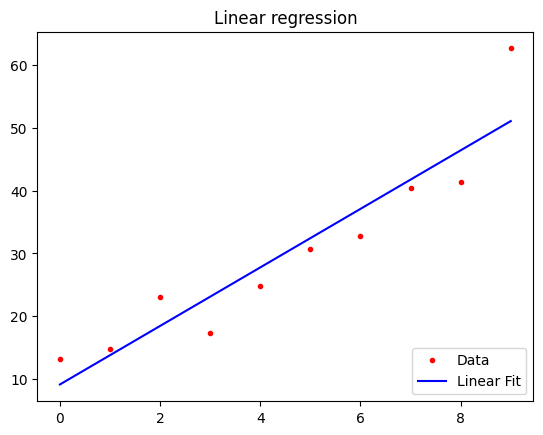

In [12]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:#10AAEA">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant $b_0$, $b_1$ et $s^2$ sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulées.


### <span style="color:#10AAEA">REPONSE 4.1 :</span> 



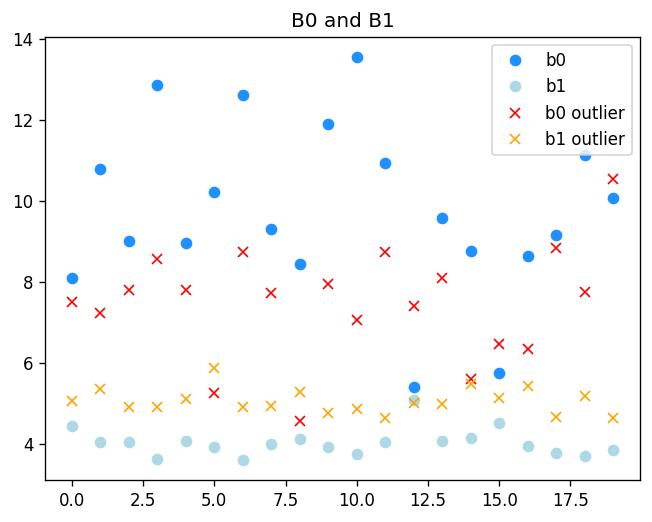

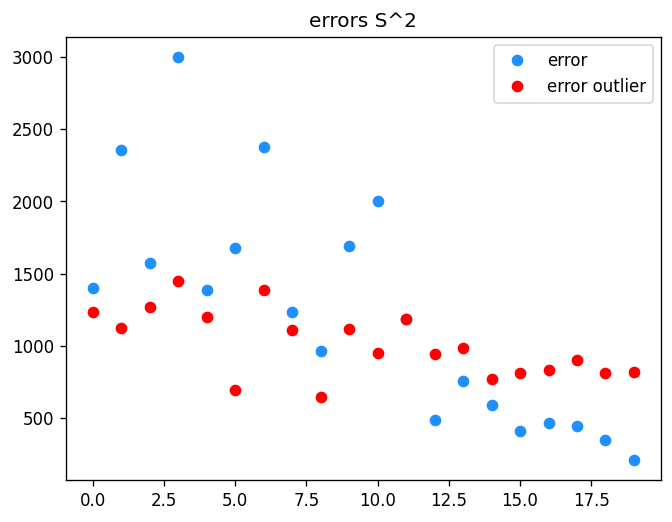

In [ ]:
ns = 10
nt = 20

X, Y = np.zeros((nt, ns)), np.zeros((nt, ns))
Lrs = []
Bs = []
S2 = []

# with outlier
Xo, Yo = np.zeros((nt, ns)), np.zeros((nt, ns))
Lrso = []
Bso = []
S2o = []

for k in range(nt):
    X[k, :], Y[k, :] = generate_data(n_samples=ns, outlier=False)
    Xo[k, :], Yo[k, :] = generate_data(n_samples=ns, outlier=True)

    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lro = LinearRegression()

    # expand X axis
    Lrs.append( lr.fit(X[[k], :].T, Y[k, :])  )
    Bs.append([lr.intercept_, lr.coef_[0]])

    Lrso.append( lro.fit(Xo[[k], :].T, Yo[k, :])  )
    Bso.append([lro.intercept_, lro.coef_[0]])
    
    # compute error
    S2.append(  1/(ns-1) * np.sum((Y - lr.intercept_ - lr.coef_[0]*X)**2)  ) ;# déjà implémentée au début
    S2o.append( 1/(ns-1) * np.sum((Yo - lro.intercept_ - lro.coef_[0]*Xo)**2)  )




Bs = np.array(Bs)
Bso = np.array(Bso)

plt.figure(dpi=120)
plt.plot(Bs[:, 0], label="b0", color="dodgerblue", linestyle="", marker="o")
plt.plot(Bs[:, 1], label="b1", color="lightblue", linestyle="", marker="o")
plt.plot(Bso[:, 0], label="b0 outlier", color="red", linestyle="", marker="x")
plt.plot(Bso[:, 1], label="b1 outlier", color="orange", linestyle="", marker="x")
#plt.grid()
plt.legend()
plt.title('B0 and B1')
plt.show()

plt.figure(dpi=120)
plt.plot(S2, label="error", color="dodgerblue", linestyle="", marker="o")
plt.plot(S2o, label="error outlier", color="red", linestyle="", marker="o")
#plt.grid()
plt.legend()
plt.title('errors S^2')
plt.show()

La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:#10AAEA">QUESTIONS 4.2 :</span> 

#### <span style="color:#10AAEA">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $$ e_{(i)j}=y_j - \hat{y_{(i)j}}$$ pour tous les j, où  $\hat{y_{(i)j}}$ est l'estimation de $y_j$ à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:#10AAEA">QUESTION 4.2.b :</span> 
En quoi le profil des $e_{(i)j}$ est différent pour i=9 que pour les autres i ?
#### <span style="color:#10AAEA">QUESTION 4.2.c :</span> 
Étendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [26]:
ns = 10
x, y = generate_data(n_samples=ns, outlier=True)

#### <span style="color:#10AAEA">REPONSE 4.2.a :</span> 


In [28]:
def profil_residuel(x, y, i):
    # number of sample
    ns = len(x)
    # initialise e
    e = np.zeros(ns)
    # delete variable i
    x_deli = np.delete(x,i)
    y_deli = np.delete(y,i)
    # compute lr
    lr = LinearRegression()
    lr.fit(x_deli[:, np.newaxis], y_deli) 
    # get y hat
    y_hat = lr.predict(x.reshape(-1, 1))
    # error
    e[:] = y - y_hat
    return e

[ 6.07207283  0.13187956  1.81612752  1.27314077 -7.7669434  -0.9645364
 -3.72367819 -0.6748218  -6.05727553 14.52670422]


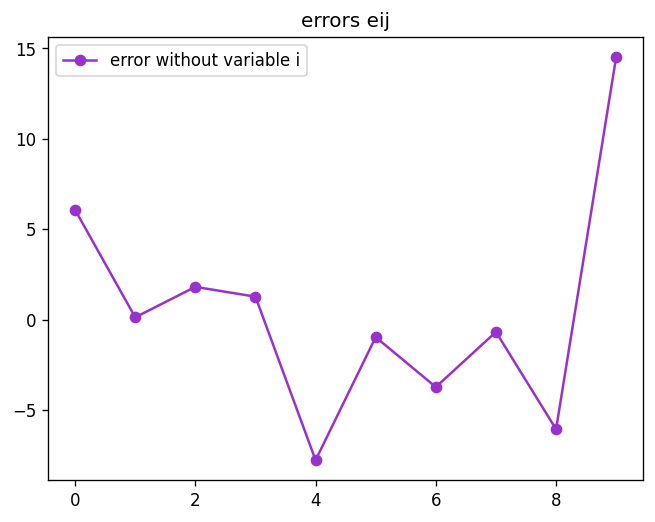

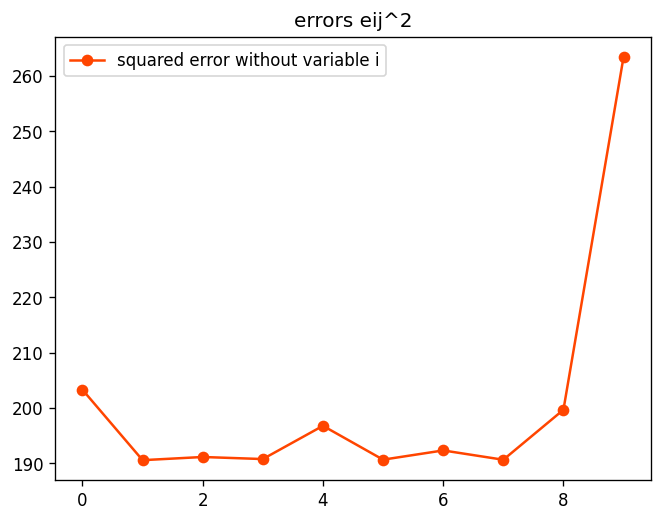

In [ ]:
eij = []
for i in range(ns):
    eij.append(profil_residuel(x, y, i))
eij = np.array(eij)
ei = np.sum(eij, axis=1)
ei2 = np.sum(eij**2, axis=1) # hoho c'est Cook ça, je suis trop malin

print(ei)

plt.figure(dpi=120)
plt.plot(ei, label="error without variable i", color="darkorchid", linestyle="-", marker="o")
plt.legend()
plt.title('errors eij')
plt.show()

plt.figure(dpi=120)
plt.plot(ei2, label="squared error without variable i", color="orangered", linestyle="-", marker="o")
plt.legend()
plt.title('errors eij^2')
plt.show()

#### <span style="color:#10AAEA">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

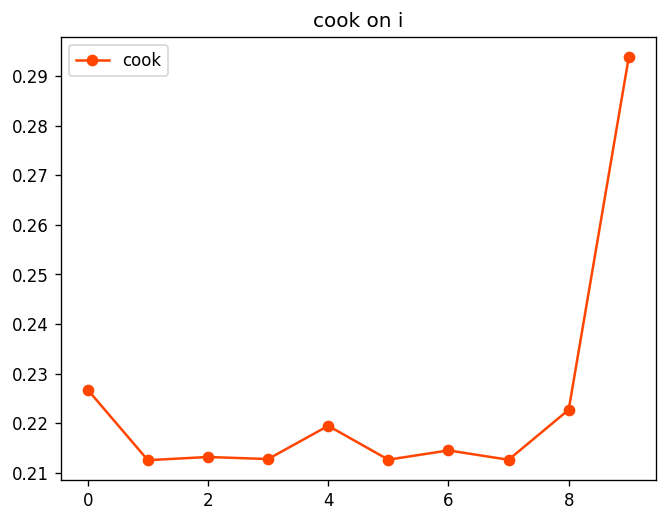

In [37]:
def cook(x, y, i):
    # number of sample
    ns = len(x)
    # delete variable i
    x_deli = np.delete(x,i)
    y_deli = np.delete(y,i)
    # compute lr
    lr = LinearRegression()
    lr.fit(x_deli[:, np.newaxis], y_deli) 
    # get y hat
    y_hati = lr.predict(x.reshape(-1, 1))
    # get y hat with i
    lr.fit(x[:, np.newaxis], y) 
    y_hat = lr.predict(x.reshape(-1, 1))
    # error
    e = np.sum((y - y_hati)**2) / (2*s2(y, y_hat)**2)
    return e

cooked = [cook(x, y, i) for i in range(ns)]

plt.figure(dpi=120)
plt.plot(cooked, label="cook", color="orangered", linestyle="-", marker="o")
plt.legend()
plt.title('cook on i')
plt.show()

#### <span style="color:#10AAEA">REPONSE 4.2.c :</span> 


In [ ]:
...

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...